# Plot Proper Motion Diagram

Examples of proper motion diagram to make the distinction between an object from the background or comoving with the star for the targets from the sample Super-Earth survey:

Based on Arthur Vigans's script "proper_motion.py". 

Modifications: 

June 1st, 2021 - Célia Desgrange

-> understood ANDROMEDA charac convention

January 13rd, 2022 - Célia Desgrange

-> let's start the automatization...
1st) find the same detections among several epochs

March 30th, 2022 - Célia Desgrange

-> well, messing it up. (well, no, but, should adapt it to fully automatize it... yiha. and especially adapt to table results, containing a mixture of ANDROMEDA and SpeCal (but it is uniformized))

June 22nd, 2022 - Célia Desgrange

-> notebook cleaned, do not think I can optimize much.

## Import packages

In [1]:
from import_packages_generic import *
from import_packages_PMD import *
from import_functions_generic import *
from import_functions_PMD import *
from import_functions_PMD_fig import *
#from import_initialization_generic_variables import *
from import_initialization_dataframes import *
#from import_initialization_CaPMD_variables import *

Use the folder super-earths located at:
 /Users/desgranc/Documents/work/projects/super-earths/


In [2]:
print('hello')
a=3

hello


In [3]:
L = time.localtime()
date = "{}-{}-{}".format(L[0],L[1],L[2],L[3],L[4],L[5])

saving_dir = 'figs/fig_PMD_v{}/'.format(date)
os.makedirs(saving_dir,exist_ok=True)

# Initialization

### Initialize for all the detections in the Super-Earth survey the magnitude in H2,H3 and K1,K2-bands

Note: all detections are from specal charac files or andromeda charac files, which have been summarized in global tables 

In [4]:
# Initialize SpeCal variables
prefix = '/Users/desgranc/Documents/work/GitHub_clone/projects/RAISES/derive_tables_candidates/tables/'
algo = 'specal+andro'
dF = pd.read_csv(prefix+'all_detections_{}_final_paper_status_corrected.csv'.format(algo),sep=',')

In [5]:
# Target DC name
target = 'GJ433'
target_DC_all = dF_obs[target==dF_obs['target name']]['target name DC']
target_DC_all

44    CD-31 9113c
45    CD-31 9113c
66    CD-31 9113c
67    CD-31 9113c
82      HIP 56528
83      HIP 56528
Name: target name DC, dtype: object

# Peering into one targeted system

## Automatized from Table 

In [6]:
help(proper_motion_diagnostic_combination_2epochs)

Help on function proper_motion_diagnostic_combination_2epochs in module import_functions_PMD:

proper_motion_diagnostic_combination_2epochs(dF, target, tol_bkg=180, unit='pixel', display=1)
    Find candidates observed in two different epochs.
        Inputs:
            .'dF' (type=dataframe): list of lists of the right ascensions for the detections in the differents epoch
            .'Y' (type=2D-list/array): list of lists of the declinations for the detections in the different epoch
            .'EPOCHS' (type=1D-list/array): list of the epochs
            (optional, below:)
            .'tolerance' (type=int/float): difference tolerated. In practice it is the some of the differences between ra1/ra2_closer and dec1/dec2_closer
            .'unit' (type='string'): indicate which unit is considered, but for now, no importance.
            .'display' (type='boolean'): indicate if display the matching values between 1st/2nd epoch and the
                            difference between 1

### Load candidates information for the comparison of 2 epochs at most

In [512]:
target='HD154088' ; display=0; tolerance=80 ; force_input_bkg=0; two_epochs=1
if target == 'GJ682': tolerance =180
if target == 'HD136352': tolerance, force_input_bkg=140, 1
DATES, RA_BKG,DEC_BKG,RA_ERR_BKG,DEC_ERR_BKG, RA_BOU,DEC_BOU,RA_ERR_BOU,DEC_ERR_BOU = proper_motion_diagnostic_combination_2epochs(dF,
                                target=target, tol_bkg=tolerance, force_input_bkg=force_input_bkg, display=display)


There are 3 epochs available.
------------------------------------------------------------------------------------------------
Epoch used as reference = 2017-06-21; second epoch = 2019-07-22.
Regarding index 0, the difference is 3977 mas, and the tolerance is set to 80 mas.
Regarding index 0, the difference is 2758 mas, and the tolerance is set to 80 mas.
Regarding index 4, the difference is 4570 mas, and the tolerance is set to 80 mas.
Regarding index 2, the difference is 4582 mas, and the tolerance is set to 80 mas.
Regarding index 4, the difference is 5738 mas, and the tolerance is set to 80 mas.
Regarding index 0, the difference is 2012 mas, and the tolerance is set to 80 mas.
Regarding index 4, the difference is 2468 mas, and the tolerance is set to 80 mas.
Regarding index 0, the difference is 4173 mas, and the tolerance is set to 80 mas.
Regarding index 2, the difference is 48 mas, and the tolerance is set to 80 mas.
Regarding index 4, the difference is 2468 mas, and the toleran

In [458]:
"""
NAME:
 import_functions_PMD

PURPOSE:
 Import functions used to compute proper motion and plot them

INPUTS:
 none

OUTPUTS:
 none

MODIFICATION HISTORY:
 2021/10/01, Written by Célia DESGRANGE, IPAG/MPIA

CONTRIBUTION:
    Pierre Kervella: functions to extract Gaia/Hipparcos detection limits
"""

from import_packages_generic import *
from import_functions_generic import *
#from import_functions_PMD import *
#from import_initialization_CaPMD_variables import *


## Functions used to make nice plots ##
def closer_positions(ra1,dec1,ra2,dec2,dra=0,ddec=0, tolerance=10, unit='mas', display=1):
    '''
    Find candidates observed in two different epochs.
        Inputs:
            .'ra1' (type=list/array): list/array of the right ascensions for the detections in the 1st epoch
            .'dec1' (type=list/array): list/array of the declinations for the detections in the 1st epoch
            .'ra2' (type=list/array): list/array of the right ascensions for the detections in the 2nd epoch
            .'dec2' (type=list/array): list/array of the declinations for the detections in the 2nd epoch
            (optional, below:)
            .'dra' (type=int/float): shift to apply to the second epoch (proper motion in RA)
            .'ddec' (type=int/float): shift to apply to the second epoch (proper motion in DEC)
            .'tolerance' (type=int/float): difference tolerated. In practice it is the some of the differences between ra1/ra2_closer and dec1/dec2_closer
            .'unit' (type='string'): indicate which unit is considered, but for now, no importance.
            .'display' (type='boolean'): indicate if display the matching values between 1st/2nd epoch and the
                            difference between 1st/2nd epoch values(just to check)

        Outputs:
            Return the detections observed in two epoch, more precisely:
                .their indexes in 1st epoch
                .their indexes in 2nd epoch
                .their RA and DEC in 2nd epoch (could be removed I guess)
    '''
    ra2_shift = np.round(np.array(ra2)-dra,2)
    dec2_shift = np.round(np.array(dec2)-ddec,2)
    N_possibilities = len(ra1) #np.nanmax([len(ra1),len(ra2)])
    INDEX1, INDEX_CLOSER, RA_CLOSER, DEC_CLOSER = [], [], [], []

    for k in range(N_possibilities):
        wanted = [ra1[k],dec1[k]]
        L      = [ra2_shift,dec2_shift]
        #print('closer_positions',L)
        index, diff = index_closer(wanted, L, constraints='several', output_diff=True)

        # if the closest value is still too far, do not consider it
        print('Regarding index {}, the difference is {:.0f} mas, and the tolerance is set to {:.0f} {}.'.format(index, diff, tolerance, unit))
        #if diff[index] < tolerance :
        if diff < tolerance :
            if display: print('error = {:.1f} mas \nwanted = {} (ep1) but {} (ep2 shifted) i.e. {} (ep2)'.format(diff, 
                    wanted, [ra2_shift[index],dec2_shift[index]],[ra2[index],dec2[index]]))
            INDEX1.append(k)
            INDEX_CLOSER.append(index)
            RA_CLOSER.append(ra2[index])
            DEC_CLOSER.append(dec2[index])
    return np.array(INDEX1),np.array(INDEX_CLOSER), np.array(RA_CLOSER), np.array(DEC_CLOSER)



#
def timedelta_between_2epochs(target,epochs,unit='year'):
    '''
    Return the proper motion expected for background contaminants between two epochs
        Inputs:
            'target' (type=string):
                    example 'HD154088'
            'epochs' (type=list/array of strings):
                    example np.array(['2017-06-21', '2019-07-22', '2021-07-04'])
            (optional)
            'unit' (type=string): precise in which units to return the timedelta
                    Default is in 'year'. Other option implemented: 'day', 'hour',
                    'minute', and 'second'.
    '''
    T = Time(epochs, format='isot', scale='utc')
    timedelta = ((T[1]-T[0])).value
    if unit == 'year': return timedelta/365.25
    elif unit == 'day' : return timedelta
    elif unit == 'hour': return timedelta*24*3600
    elif unit == 'minute': return timedelta*24*60
    elif unit == 'second': return timedelta*24*3600
    else : return print("this unit is not yet implemented")


def find_proper_motion_between_2epochs(target,epochs,unit='mas',pixarc=12.25):
     '''
     Return the proper motion expected for background contaminants between two epochs
         Inputs:
             'target' (type=string):
                     example 'HD154088'
             'epochs' (type=list/array of strings):
                     example np.array(['2017-06-21', '2019-07-22', '2021-07-04'])
             (optional below)
             'unit' (type=string): precise in which units to return the proper motion
                     Default is in 'mas'. Other option implemented: 'pixel'.
             'pixarc' (type=float): in case the 'unit' is to 'pixel', precise what is
                     the factor of conversion. Default is 12.25 mas, corresponding to
                     the platescale from the SPHERE-IRDIS instrument.
     '''
     timedelta = timedelta_between_2epochs(target,epochs,unit='year')

     result_table_names = customSimbad.query_object(target)
     pm_ra, pm_dec = result_table_names['PMRA'], -result_table_names['PMDEC']
     pm_ra, pm_dec = float(pm_ra.value)*timedelta, float(pm_dec.value)*timedelta
     if unit == 'mas':
         return pm_ra, pm_dec
     if unit == 'pixel':
         return pm_ra/pixarc, pm_dec/pixarc
     #print("Proper motion per year:", pm_ra, pm_dec)
     #print("Proper motion between the two epochs", pm_ra*timedelta, pm_dec*timedelta)
     return


def find_proper_motion_per_year(target,unit='mas',pixarc=12.25):
    '''
    Return the proper motion expected for background contaminants between two epochs
        Inputs:
            'target' (type=string):
                    example 'HD154088'
            (optional below)
            'unit' (type=string): precise in which units to return the proper motion
                    Default is in 'mas'. Other option implemented: 'pixel'.
            'pixarc' (type=float): in case the 'unit' is to 'pixel', precise what is
                    the factor of conversion. Default is 12.25 mas, corresponding to
                    the platescale from the SPHERE-IRDIS instrument.
    '''
    epochs = ["2021-01-01","2022-01-01"]
    return find_proper_motion_between_2epochs(target,epochs,unit=unit,pixarc=pixarc)








def proper_motion_diagnostic_combination_2epochs(dF, target, tol_bkg=180, tolerance_background_max=180, 
                                                 force_input_bkg=0, unit='pixel', display=1):
    '''
    Find candidates observed in two different epochs.
        Inputs:
            .'dF' (type=dataframe): list of lists of the right ascensions for the detections in the differents epoch
            .'Y' (type=2D-list/array): list of lists of the declinations for the detections in the different epoch
            .'EPOCHS' (type=1D-list/array): list of the epochs
            (optional, below:)
            .'tolerance' (type=int/float): difference tolerated. In practice it is the some of the differences between ra1/ra2_closer and dec1/dec2_closer
            .'unit' (type='string'): indicate which unit is considered, but for now, no importance.
            .'display' (type='boolean'): indicate if display the matching values between 1st/2nd epoch and the
                            difference between 1st/2nd epoch values(just to check)

        Outputs:
            Return the common (and uncommon) candidates for each comparison:
                .'epochs_compared' (type=1D-list): list of epochs compared
                .''
                .their indexes in 1st epoch
                .their indexes in 2nd epoch
                .their RA and DEC in 2nd epoch (could be removed I guess)
    '''
    #dF, target

    cond_target = dF['target']==target
    unique_epochs = np.unique(np.array(dF[cond_target]['epoch']))

    tolerance_background_ref = tol_bkg
    tolerance_promising = 100

    ep_comp, bkg_cand_RA, bkg_cand_DEC, bound_cand_RA, bound_cand_DEC = [],[],[],[],[]
    bkg_cand_RA_err, bkg_cand_DEC_err, bound_cand_RA_err, bound_cand_DEC_err = [],[],[],[]

    print('\nThere are {} epochs available.'.format(len(unique_epochs)))

    for j in range(1,len(unique_epochs)):
        for k in range(j):
            epoch1, epoch2, unit = unique_epochs[k], unique_epochs[j], 'mas'
            print('------------------------------------------------------------------------------------------------')
            print('Epoch used as reference = {}; second epoch = {}.'.format(epoch1, epoch2))
            cond_target_epoch1 = np.logical_and(cond_target, dF['epoch']==epoch1)
            cond_target_epoch2 = np.logical_and(cond_target, dF['epoch']==epoch2)

            pm_ra_yr, pm_dec_yr = find_proper_motion_per_year(target,unit=unit)
            pm_ra, pm_dec = find_proper_motion_between_2epochs(target,[epoch1, epoch2],unit=unit)

            if display :
                print("Proper motion per year: {:.1f} {} {:.1f} {}".format(pm_ra_yr, unit, pm_dec_yr, unit))
                print("Proper motion between the two epochs: {:.1f} {} {:.1f} {}".format(pm_ra, unit, pm_dec, unit))
                print("Shift expected if background: {:.1f}".format(np.sqrt(pm_ra**2+pm_dec**2)))

            #print('tolerance_background_ref {:.1f} mas'.format(tolerance_background_ref))
            tolerance_background = np.max([tolerance_background_ref, np.sqrt(pm_ra**2+pm_dec**2) / 10])
            #print('tolerance_background {:.1f} mas'.format(tolerance_background))
            if tolerance_background > tolerance_background_max : tolerance_background = tolerance_background_max
            if force_input_bkg: tolerance_background = tolerance_background_ref
        
            if display: print("We fix the tolerance at {:.0f} mas.".format(tolerance_background))
            ra1, dec1 = np.array(dF[cond_target_epoch1]['ra_mas']), np.array(dF[cond_target_epoch1]['dec_mas'])
            ra1_err, dec1_err = np.array(dF[cond_target_epoch1]['ra_err_mas']), np.array(dF[cond_target_epoch1]['dec_err_mas'])
            ra2, dec2 = np.array(dF[cond_target_epoch2]['ra_mas']), np.array(dF[cond_target_epoch2]['dec_mas'])
            ra2_err, dec2_err = np.array(dF[cond_target_epoch2]['ra_err_mas']), np.array(dF[cond_target_epoch2]['dec_err_mas'])


            # background
            idx1, idx2, dum, dum = closer_positions(ra1, dec1, ra2, dec2, dra=-pm_ra, ddec=pm_dec,
                                                    tolerance=tolerance_background, display=display)

            #idx1_all, idx2_all = np.arange(0,len(ra1),1), np.arange(0,len(ra2),1)
            if display:
                print("\nra1 =\n{}\n dec1 = \n{}\n\nra2 =\n{}\n dec2 = \n{}".format(ra1, dec1, ra2, dec2))
                print("\nra2-pm =\n{}\n dec2-pm = \n{}".format(ra2+pm_ra, dec2-pm_dec))

            # Stock them
            ep_comp.append([epoch1,epoch2])

            try:
                bkg_cand_RA.append(np.array([ra1[idx1],ra2[idx2]])); bkg_cand_DEC.append(np.array([dec1[idx1],dec2[idx2]]))
                bkg_cand_RA_err.append(np.array([ra1_err[idx1],ra2_err[idx2]])); bkg_cand_DEC_err.append(np.array([dec1_err[idx1],dec2_err[idx2]]))

            except:
                bkg_cand_RA.append(np.array([[None],[None]])); bkg_cand_DEC.append(np.array([[None],[None]]))
                bkg_cand_RA_err.append(np.array([[None],[None]])); bkg_cand_DEC_err.append(np.array([[None],[None]]))

            print('\nNumber of objects observed at least twice consistent with background contaminants found: {} / {}'.format(len(idx1),np.min([len(ra1),len(ra2)])))

            # detection(s) observed at least twice and following a background i.e. epicycle motion

            # promising
            idx1, idx2, dum, dum = closer_positions(ra1, dec1, ra2, dec2, dra=0, ddec=0,
                                                    tolerance=tolerance_promising,display=0)
            # Stock them

            try:
                bound_cand_RA.append(np.array([ra1[idx1],ra2[idx2]])); bound_cand_DEC.append(np.array([dec1[idx1],dec2[idx2]]))
                bound_cand_RA_err.append(np.array([ra1_err[idx1],ra2_err[idx2]])); bound_cand_DEC_err.append(np.array([dec1_err[idx1],dec2_err[idx2]]))
            except:
                bound_cand_RA.append(np.array([[None],[None]])); bound_cand_DEC.append(np.array([[None],[None]]))
                bound_cand_RA_err.append(np.array([[None],[None]])); bound_cand_DEC_err.append(np.array([[None],[None]]))

    return ep_comp, bkg_cand_RA, bkg_cand_DEC, bkg_cand_RA_err, bkg_cand_DEC_err, bound_cand_RA, bound_cand_DEC, bound_cand_RA_err, bound_cand_DEC_err



def proper_motion_diagnostic_combination_all_epochs(dF, target, tol_bkg=180, tolerance_background_max=180, force_input_bkg=0,
                                                    unit='pixel', display=1):
    '''
    Find candidates observed in two different epochs.
        Inputs:
            .'X' (type=2D-list/array): list of lists of the right ascensions for the detections in the differents epoch
            .'Y' (type=2D-list/array): list of lists of the declinations for the detections in the different epoch
            .'EPOCHS' (type=1D-list/array): list of the epochs
            (optional, below:)
            .'tolerance' (type=int/float): difference tolerated. In practice it is the some of the differences between ra1/ra2_closer and dec1/dec2_closer
            .'unit' (type='string'): indicate which unit is considered, but for now, no importance.
            .'display' (type='boolean'): indicate if display the matching values between 1st/2nd epoch and the
                            difference between 1st/2nd epoch values(just to check)

        Outputs:
            Return the common (and uncommon) candidates for each comparison:
                .'epochs_compared' (type=1D-list): list of epochs compared
                .''
                .their indexes in 1st epoch
                .their indexes in 2nd epoch
                .their RA and DEC in 2nd epoch (could be removed I guess)
    '''
    #dF, target

    cond_target = dF['target']==target
    unique_epochs = np.unique(np.array(dF[cond_target]['epoch']))

    tolerance_background_ref = tol_bkg
    tolerance_promising = 100

    ep_comp, cand_RA, cand_DEC = [],[],[]
    bkg_cand_idx, cand_RA_err, cand_DEC_err = [], [],[]

    print('\nThere are {} epochs available.'.format(len(unique_epochs)))

    for j in range(1,len(unique_epochs)):
        epoch1, epoch2, unit = unique_epochs[0], unique_epochs[j], 'mas'
        print('------------------------------------------------------------------------------------------------')
        print('Epoch used as reference = {}; second epoch = {}.'.format(epoch1, epoch2))
        cond_target_epoch1 = np.logical_and(cond_target, dF['epoch']==epoch1)
        cond_target_epoch2 = np.logical_and(cond_target, dF['epoch']==epoch2)

        pm_ra_yr, pm_dec_yr = find_proper_motion_per_year(target,unit=unit)
        pm_ra, pm_dec = find_proper_motion_between_2epochs(target,[epoch1, epoch2],unit=unit)

        if display :
            print("Proper motion per year: {:.1f} {} {:.1f} {}".format(pm_ra_yr, unit, pm_dec_yr, unit))
            print("Proper motion between the two epochs: {:.1f} {} {:.1f} {}".format(pm_ra, unit, pm_dec, unit))
            print("Shift expected if background: {:.1f}".format(np.sqrt(pm_ra**2+pm_dec**2)))
        #print('tolerance_background_ref {:.1f} mas'.format(tolerance_background_ref))
        tolerance_background = np.max([tolerance_background_ref, np.sqrt(pm_ra**2+pm_dec**2) / 12])
        #print('tolerance_background {:.1f} mas'.format(tolerance_background))
        if tolerance_background > tolerance_background_max : tolerance_background = tolerance_background_max
        if force_input_bkg: tolerance_background = tolerance_background_ref
                
        if display: print("We fix the tolerance at {:.0f} mas.".format(tolerance_background))
        ra1, dec1 = np.array(dF[cond_target_epoch1]['ra_mas']), np.array(dF[cond_target_epoch1]['dec_mas'])
        ra1_err, dec1_err = np.array(dF[cond_target_epoch1]['ra_err_mas']), np.array(dF[cond_target_epoch1]['dec_err_mas'])
        ra2, dec2 = np.array(dF[cond_target_epoch2]['ra_mas']), np.array(dF[cond_target_epoch2]['dec_mas'])
        ra2_err, dec2_err = np.array(dF[cond_target_epoch2]['ra_err_mas']), np.array(dF[cond_target_epoch2]['dec_err_mas'])

        # background
        idx1, idx2, dum, dum = closer_positions(ra1, dec1, ra2, dec2, dra=-pm_ra, ddec=pm_dec,
                                                tolerance=tolerance_background, display=display)

        #idx1_all, idx2_all = np.arange(0,len(ra1),1), np.arange(0,len(ra2),1)
        if display:
            print("\nra1 =\n{}\n dec1 = \n{}\n\nra2 =\n{}\n dec2 = \n{}".format(ra1, dec1, ra2, dec2))
            print("\nra2-pm =\n{}\n dec2-pm = \n{}".format(ra2+pm_ra, dec2-pm_dec))

        # Stock them
        ep_comp.append([epoch1,epoch2])

        try:
            cand_RA.append(np.array([ra1,ra2])); cand_DEC.append(np.array([dec1,dec2]))
            cand_RA_err.append(np.array([ra1_err,ra2_err])); cand_DEC_err.append(np.array([dec1_err,dec2_err]))
            bkg_cand_idx.append(np.array([idx1,idx2]))

        except:
            cand_RA.append(np.array([[None],[None]])); cand_DEC.append(np.array([[None],[None]]))
            cand_RA_err.append(np.array([[None],[None]])); cand_DEC_err.append(np.array([[None],[None]]))
            bkg_cand_idx.append(np.array([[None],[None]]))

        print('\nNumber of objects observed at least twice consistent with background contaminants found: {} / {}'.format(len(idx1),np.min([len(ra1),len(ra2)])))



    #Just to know:
    list_idx_ref_ep1 = bkg_cand_idx[0][0] #which correspond in ep2 bkg_cand_idx[0][1]

    idx_everytime, RA_BKG_everytime, RA_ERR_BKG_everytime, DEC_BKG_everytime, DEC_ERR_BKG_everytime = [], [], [], [], []
    # loop over the index of the candidates in one epoch which are common in at least one other epoch
    for i, idx_ref in enumerate(list_idx_ref_ep1):
        if len(unique_epochs) == 3:
            # if the candidate is found as well in the third epoch i.e. in the second comparison of epochs

            if idx_ref in bkg_cand_idx[1][0]:
                # add the candidate in the memory
                idx_add_epoch2 = bkg_cand_idx[0][1][i]
                idx_add_epoch3 = bkg_cand_idx[1][1][np.where(bkg_cand_idx[1][0]==idx_ref)[0][0]]

                idx_everytime.append([idx_ref, idx_add_epoch2, idx_add_epoch3])

                # save its RA in the first epoch and second epoch

                ra1, ra2, ra3 = cand_RA[0][0][idx_ref], cand_RA[0][1][idx_add_epoch2], cand_RA[1][1][idx_add_epoch3]
                ra_err1, ra_err2, ra_err3 = cand_RA_err[0][0][idx_ref], cand_RA_err[0][1][idx_add_epoch2], cand_RA_err[1][1][idx_add_epoch3]
                dec1, dec2, dec3 = cand_DEC[0][0][idx_ref], cand_DEC[0][1][idx_add_epoch2], cand_DEC[1][1][idx_add_epoch3]
                dec_err1, dec_err2, dec_err3 = cand_DEC_err[0][0][idx_ref], cand_DEC_err[0][1][idx_add_epoch2], cand_DEC_err[1][1][idx_add_epoch3]

                RA_BKG_everytime.append([ra1,ra2,ra3])
                RA_ERR_BKG_everytime.append([ra_err1,ra_err2,ra_err3])
                DEC_BKG_everytime.append([dec1,dec2,dec3])
                DEC_ERR_BKG_everytime.append([dec_err1,dec_err2,dec_err3])

        if len(unique_epochs) == 4:
            # if the candidate is found as well in the third epoch i.e. in the second comparison of epochs

            if idx_ref in bkg_cand_idx[1][0] and idx_ref in bkg_cand_idx[2][0]:
                # add the candidate in the memory
                idx_add_epoch2 = bkg_cand_idx[0][1][i]
                idx_add_epoch3 = bkg_cand_idx[1][1][np.where(bkg_cand_idx[1][0]==idx_ref)[0][0]]
                idx_add_epoch4 = bkg_cand_idx[2][1][np.where(bkg_cand_idx[2][0]==idx_ref)[0][0]]

                idx_everytime.append([idx_ref, idx_add_epoch2, idx_add_epoch3, idx_add_epoch4])
                # save its RA in the first epoch and second epoch

                ra1, ra2, ra3, ra4 = cand_RA[0][0][idx_ref], cand_RA[0][1][idx_add_epoch2], cand_RA[1][1][idx_add_epoch3], cand_RA[2][1][idx_add_epoch4]
                ra_err1, ra_err2, ra_err3, ra_err4 = cand_RA_err[0][0][idx_ref], cand_RA_err[0][1][idx_add_epoch2], cand_RA_err[1][1][idx_add_epoch3], cand_RA_err[2][1][idx_add_epoch4]
                dec1, dec2, dec3, dec4 = cand_DEC[0][0][idx_ref], cand_DEC[0][1][idx_add_epoch2], cand_DEC[1][1][idx_add_epoch3], cand_DEC[2][1][idx_add_epoch4]
                dec_err1, dec_err2, dec_err3, dec_err4 = cand_DEC_err[0][0][idx_ref], cand_DEC_err[0][1][idx_add_epoch2], cand_DEC_err[1][1][idx_add_epoch3], cand_DEC_err[2][1][idx_add_epoch4]

                RA_BKG_everytime.append([ra1,ra2,ra3,ra4])
                RA_ERR_BKG_everytime.append([ra_err1,ra_err2,ra_err3,ra_err4])
                DEC_BKG_everytime.append([dec1,dec2,dec3,dec4])
                DEC_ERR_BKG_everytime.append([dec_err1,dec_err2,dec_err3,dec_err4])

    RA_BKG_everytime = np.array(RA_BKG_everytime).transpose()
    RA_ERR_BKG_everytime = np.array(RA_ERR_BKG_everytime).transpose()
    DEC_BKG_everytime = np.array(DEC_BKG_everytime).transpose()
    DEC_ERR_BKG_everytime = np.array(DEC_ERR_BKG_everytime).transpose()
    # format:
    # first line = in first epoch, positions of all the candidates detected everytime
    # second line = in second epoch, positions of all the candidates detected everytime
    # etc

    return unique_epochs, RA_BKG_everytime, DEC_BKG_everytime, RA_ERR_BKG_everytime, DEC_ERR_BKG_everytime


## Load candidates information for the comparison of 3 or more epochs 

In [406]:
target='GJ682' ; display=0 ; two_epochs=0
DATES, RA_BKG,DEC_BKG,RA_ERR_BKG,DEC_ERR_BKG = proper_motion_diagnostic_combination_all_epochs(dF,target, display=display)


There are 3 epochs available.
------------------------------------------------------------------------------------------------
Epoch used as reference = 2017-06-23; second epoch = 2017-07-20.
Regarding index 23, the difference is 80 mas, and the tolerance is set to 180 mas.
Regarding index 26, the difference is 92 mas, and the tolerance is set to 180 mas.
Regarding index 24, the difference is 86 mas, and the tolerance is set to 180 mas.
Regarding index 7, the difference is 88 mas, and the tolerance is set to 180 mas.
Regarding index 20, the difference is 82 mas, and the tolerance is set to 180 mas.
Regarding index 25, the difference is 86 mas, and the tolerance is set to 180 mas.
Regarding index 27, the difference is 87 mas, and the tolerance is set to 180 mas.
Regarding index 22, the difference is 89 mas, and the tolerance is set to 180 mas.
Regarding index 0, the difference is 91 mas, and the tolerance is set to 180 mas.
Regarding index 9, the difference is 87 mas, and the tolerance

/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_1604/674412326.py:325: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cand_RA.append(np.array([ra1,ra2])); cand_DEC.append(np.array([dec1,dec2]))
/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_1604/674412326.py:326: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cand_RA_err.append(np.array([ra1_err,ra2_err])); cand_DEC_err.append(np.array([dec1_err,dec2_err]))
/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_1604/674412326.py:325: VisibleDeprecationWarning: Creating an nda

## Properties: Observations / Candidates / Star

In [312]:
RA_BKG[:]

[array([[1842.6],
        [6303.4]]),
 array([[1817.2, 1842.6],
        [6669. , 6679.4]]),
 array([[-2624.7, -3060.5,  6303.4],
        [-2244.3, -2676.2,  6679.4]])]

In [313]:
DEC_BKG[:]

[array([[1420.1],
        [-800.2]]),
 array([[1808.5, 1420.1],
        [-533.6, -921.9]]),
 array([[-730.7,  281.2, -800.2],
        [-854.5,  156.4, -921.9]])]

In [235]:
DATES[0]

['2017-07-14', '2021-07-04']

In [224]:
RA_BKG = np.array(RA_BKG)
DEC_BKG = np.array(DEC_BKG)

RA_ERR_BKG = np.array(RA_ERR_BKG)
DEC_ERR_BKG = np.array(DEC_ERR_BKG)

PCA reduction Célia

2019-07-09

CENTER = (313, 313)
POSITION = (313.316, 229.345) PIX  # Channel 1 & 2

(RA,DEC) = (-0.316, -83.655) PIX 

(RA,DEC) = (-3.871, -1024.77) MAS
    
    
2016-04-05

POSITION = (321.5, 224.5) PIX  # Channel 1 & 2

(RA,DEC) = (-8.5, -88.5) PIX 

(RA,DEC) = (-104.125, -1084.125) MAS


2016-06-03

POSITION = (319.75, 225) PIX  # Channel 1 & 2

(RA,DEC) = (-6.75, -88) PIX 

(RA,DEC) = (-82.688, -1078) MAS

    


In [96]:
## Properties
target = 'HD120326'
dates = ['2016-04-05', '2016-06-03', '2019-07-09']
dra, ddec = [-104.125, -82.688, -0.316], [-1084.125, -1078, -1024.77]
dra_err, ddec_err = [0.5, 1, 0.5], [0.5, 1, 0.5]

DATES, RA_BKG, DEC_BKG, RA_ERR_BKG, DEC_ERR_BKG = dates, dra, ddec, dra_err, ddec_err

n_epochs = 3
    
# Star properties
plx = 8.8287e-3
plx_err = 0.0295e-3
dist, dist_err = parallax2parsec(plx, plx_err)


# Load some extra properties of the star from Simbad
result_table_names = customSimbad.query_object(target)

pm_err_star = np.max([result_table_names['PM_ERR_MAJA'][0],result_table_names['PM_ERR_MINA'][0]])
prop = {
    'ra': result_table_names['RA'][0],
    'dec': result_table_names['DEC'][0],
    'dist': dist,
    'dist_err': dist_err,
    'plx': plx,
    'plx_err': plx_err,
    'pm': [result_table_names['PMRA'][0],result_table_names['PMDEC'][0]],
    'pm_err': [pm_err_star,pm_err_star],
    #'pm_bkg': [-20, -30],
    #'pm_bkg_err': [6.5, 5.8]
}

print("DATES:\n{}\nRA:\n{}\nDEC:\n{}".format(dates,dra,ddec))

DATES:
['2016-04-05', '2016-06-03', '2019-07-09']
RA:
[-104.125, -82.688, -0.316]
DEC:
[-1084.125, -1078, -1024.77]


### Load RA and DEC tracks expected if background

[3561. 3562. 3563. ... 9507. 9508. 9509.]
dra_err (3,)
pm_ra_err ()
x_earth (5949,)
day_min ()
y_earth (5949,)


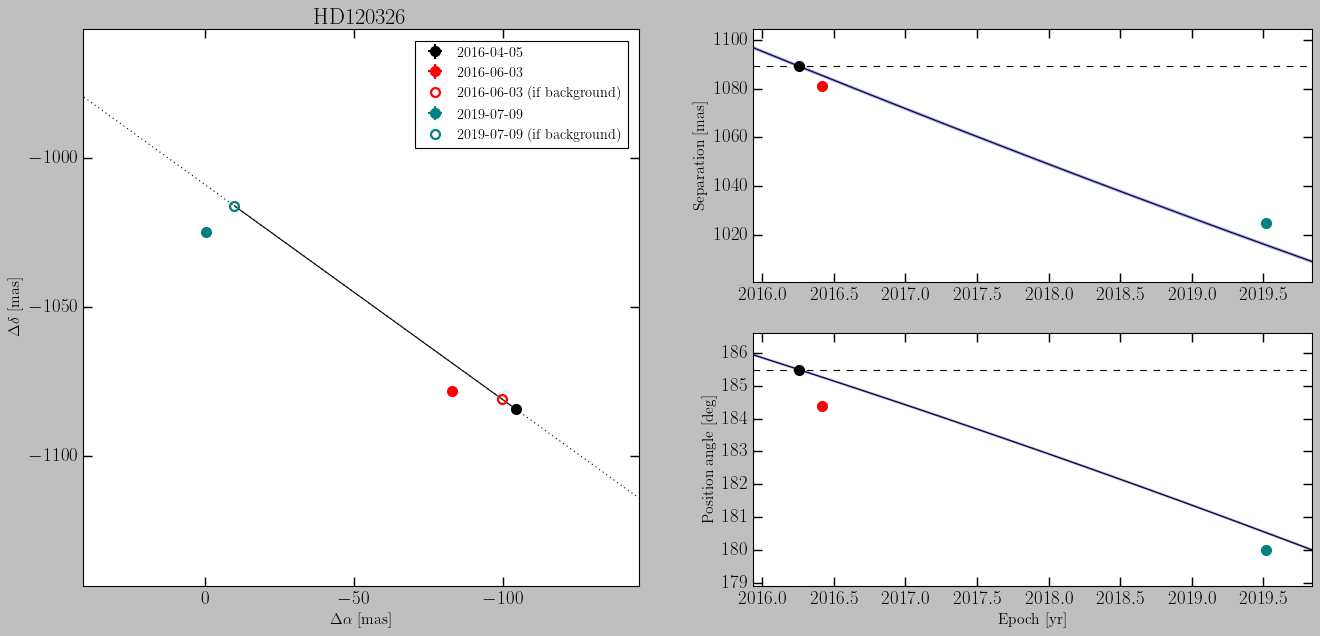

In [34]:
fig, ax, RA_track, DEC_track, RA_expected_bkg, DEC_expected_bkg = proper_motion.plots(target, dates, 
                        dra, dra_err, ddec, ddec_err, prop, 
                        legend_loc=0, return_tracks=1, return_expected_positions=1)
mise_en_page(ax)
plt.savefig('{}PMD_{}_overview_{}epochs.pdf'.format(saving_dir,target,n_epochs))

## Plot detections on the PMD


#### Use a reference epoch to plot difference in relative declination vs difference in relative right ascension

In [36]:
# General parameters 
# Fixed parameters for plotting
xlab = r'$\Delta \alpha_{ref} - \Delta \alpha$ (mas)'
ylab = r'$\Delta \delta_{ref} - \Delta \delta$ (mas)'

# Mise en page
loc, ncol = 'upper left',1 ; add_zoom_text = ''
xdeb_leg, xfin_leg, ydeb_leg, yfin_leg = 1e4, -1e4, -1e4,  8000

# zoom
add_zoom, add_zoom2 = 0,0
axes2_xdeb, axes2_ydeb, axes2_xlong, axes2_ylong = 0.67, 0.45, 0.22, 0.22
xlim_zoom, ylim_zoom, dlim =  [-350,-440], [50,180], 40
x_step_zoom=0; y_step_zoom=0 ; x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5

# candidates/tracks
label = '' ; add_candidate = 0
marker = 'o'  ; marker_epoch = ['o','d','<']
color_background = 'blue'
color_detection = [[0.9,0.8,0],'red', 'teal', 'orange', 'purple', 'black', 'magenta',  [0.9,0.8,0], 
                   'navy', [0.4,0.4,1], [0.2,1,0.2], [0.5,1,0.5],  [0,0,0.5],  
                   [0.5,0,0],  [0.9,0.5,0.9],  [0.2,0.8,1], [0.5,0.5,0.5] , 'forestgreen',
                  'royalblue','mediumseagreen','palevioletred']


- More than 1 candidate and than 2 epochs

In [433]:
# Epochs considered
n_epochs,n_candidates = len(DATES), len(RA_BKG[0])
print(n_candidates, 'candidates')
dates = DATES
RA, DEC, RA_ERR, DEC_ERR = RA_BKG, DEC_BKG, RA_ERR_BKG, DEC_ERR_BKG
XRA, YDEC = RA[0]-RA[:], DEC[0]-DEC[:]
XRA_ERR, YDEC_ERR = np.sqrt(RA_ERR[0]**2+RA_ERR[:]**2), np.sqrt(DEC_ERR[0]**2+DEC_ERR[:]**2)

7 candidates


3 7 [[0.9, 0.8, 0], 'red', 'teal', 'orange', 'purple', 'black', 'magenta', [0.9, 0.8, 0], 'navy', [0.4, 0.4, 1], [0.2, 1, 0.2], [0.5, 1, 0.5], [0, 0, 0.5], [0.5, 0, 0], [0.9, 0.5, 0.9], [0.2, 0.8, 1], [0.5, 0.5, 0.5], 'forestgreen', 'royalblue', 'mediumseagreen', 'palevioletred']
2 7 [[0.9, 0.8, 0], 'red', 'teal', 'orange', 'purple', 'black', 'magenta', [0.9, 0.8, 0], 'navy', [0.4, 0.4, 1], [0.2, 1, 0.2], [0.5, 1, 0.5], [0, 0, 0.5], [0.5, 0, 0], [0.9, 0.5, 0.9], [0.2, 0.8, 1], [0.5, 0.5, 0.5], 'forestgreen', 'royalblue', 'mediumseagreen', 'palevioletred']
2 7 [[0.9, 0.8, 0], 'red', 'teal', 'orange', 'purple', 'black', 'magenta', [0.9, 0.8, 0], 'navy', [0.4, 0.4, 1], [0.2, 1, 0.2], [0.5, 1, 0.5], [0, 0, 0.5], [0.5, 0, 0], [0.9, 0.5, 0.9], [0.2, 0.8, 1], [0.5, 0.5, 0.5], 'forestgreen', 'royalblue', 'mediumseagreen', 'palevioletred']


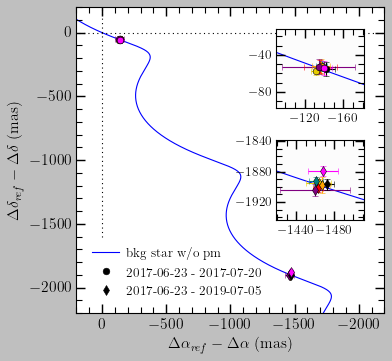

In [432]:
fig, ax = plt.subplots(1,1,figsize=(5,4.5))
fig.subplots_adjust(left=0.18,bottom=0.12,top=0.97,right=0.95)

## Add detections for each epoch ##
fig_PMD_add_track_and_candidates(ax, RA_track,DEC_track, XRA,YDEC,YDEC_ERR,XRA_ERR, marker_epoch,
                color_detection, color_bkg= color_background, n_candidates=n_candidates, 
                n_epochs=n_epochs, dates=dates)

## Load specifications (target dependent) ##
params = custom_sev_epochs_sev_candidates(target,ax,n_epochs=n_epochs) 
xlim, ylim = params['xlim'], params['ylim']
x_step, y_step = params['x_step'], params['y_step']
x_maj_step, y_maj_step = params['x_maj_step'], params['y_maj_step']
x_min_step, y_min_step = params['x_min_step'], params['y_min_step']
ydeb_leg, yfin_leg = params['ydeb_leg'], params['yfin_leg']
xlim_zoom, ylim_zoom = params['xlim_zoom'], params['ylim_zoom']
add_zoom, x_step_zoom, y_step_zoom = params['add_zoom'], params['x_step_zoom'], params['y_step_zoom']
x_maj_step_zoom, y_maj_step_zoom = params['x_maj_step_zoom'], params['y_maj_step_zoom']
x_min_step_zoom, y_min_step_zoom = params['x_min_step_zoom'], params['y_min_step_zoom']
axes2_xdeb,   axes2_ydeb = params['axes2_xdeb'], params['axes2_ydeb']
axes2_xlong, axes2_ylong = params['axes2_xlong'], params['axes2_ylong']

add_zoom_2, xlim_zoom2, ylim_zoom2 = params['add_zoom_2'], params['xlim_zoom2'], params['ylim_zoom2']
axes2_xdeb2,   axes2_ydeb2 = params['axes2_xdeb2'], params['axes2_ydeb2']
axes2_xlong2, axes2_ylong2 = params['axes2_xlong2'], params['axes2_ylong2']
loc = params['loc']

## Set limits, equal, legend, reference vertical and horizontal lines ##
fig_PMD_set_diag(ax, xlab=xlab, ylab=ylab, xlim=xlim,ylim=ylim, loc=loc, ncol=ncol,
                 xdeb_leg=xdeb_leg,xfin_leg=xfin_leg, ydeb_leg=ydeb_leg,yfin_leg=yfin_leg)


# add second small plot
if add_zoom :
    add_zoom_text, idx_ep = '_zoom', 1
    axes2 = fig.add_axes([axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong]) # renvoie un objet Axes       
    
    # add track and detections for each epoch
    dum, dum, xlim_zoom, ylim_zoom = fig_PMD_add_track_and_candidates(axes2, RA_track, DEC_track, 
                        XRA[idx_ep],YDEC[idx_ep],
                        YDEC_ERR[idx_ep],XRA_ERR[idx_ep], marker_epoch[idx_ep-1],color_detection,
                        n_epochs=2, add_candidate=1, n_candidates=n_candidates, return_lim=1, dlim=dlim)

    ## Set limits, equal, legend, reference vertical and horizontal lines ##
    fig_PMD_set_zoom(axes2, xlim=xlim_zoom, ylim=ylim_zoom) 
                                                                      
    mise_en_page(axes2,x_step=x_step_zoom,y_step=y_step_zoom,x_maj_step=x_maj_step_zoom,
                x_min_step=x_min_step_zoom, y_maj_step=y_maj_step_zoom, y_min_step=y_min_step_zoom)

                                                                      
if add_zoom_2 :
    add_zoom_text, idx_ep = '_zoom', 2
    axes2 = fig.add_axes([axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2]) # renvoie un objet Axes       
    
    # add track and detections for each epoch
    dum, dum, xlim_zoom, ylim_zoom = fig_PMD_add_track_and_candidates(axes2, RA_track, DEC_track, 
                           XRA[idx_ep],YDEC[idx_ep],
                           YDEC_ERR[idx_ep],XRA_ERR[idx_ep], marker_epoch[idx_ep-1],color_detection, 
                           n_epochs=2, add_candidate=1,  n_candidates=n_candidates, return_lim=1, dlim=dlim)

    
    ## Set limits, equal, legend, reference vertical and horizontal lines ##
    fig_PMD_set_zoom(axes2,  xlim=xlim_zoom,
                     ylim= ylim_zoom)
   
    # update ticks
    custom_sev_epochs_sev_candidates_ticks(target, axes2, n_epochs=n_epochs)

    mise_en_page(axes2,x_step=x_step_zoom,y_step=y_step_zoom,x_maj_step=x_maj_step_zoom, x_min_step=x_min_step_zoom, y_maj_step=y_maj_step_zoom, y_min_step=y_min_step_zoom)

mise_en_page(ax,x_step=x_step,y_step=y_step, 
             x_maj_step=x_maj_step, x_min_step=x_min_step, y_maj_step=y_maj_step, y_min_step=y_min_step) 

plt.savefig('{}PMD_{}_3epochs{}.pdf'.format(saving_dir,target,add_zoom_text))
#plt.savefig('{}PMD_{}_3epochs{}.png'.format(saving_dir,target,add_zoom_text))

In [416]:


def fig_PMD_add_track_and_candidates(ax, RA_track, DEC_track, XRA,YDEC,YDEC_ERR,XRA_ERR,marker,color,color_bkg='blue',
        n_epochs=2, dates=None, n_candidates=1, add_candidate=1, return_lim=0, dlim=30):
    '''
    marker (type=list):  Otherwise, list of size the number of dates minus 1.
        i.e. list of 1 element if 'n_epochs' set to 2.
    '''
    ax.plot(RA_track,DEC_track,c=color_bkg,ls='-', label='bkg star w/o pm') #labx=xlab,laby=ylab
    print(n_epochs, n_candidates, color)
    if n_epochs == 2 :
        for i in range(n_candidates):
            if n_candidates < 10 :
                label = 'candidate {}'.format(i+1)
            else :
                if color[i] == 'black' : label = '{} candidates'.format(n_candidates)
                else : label =''
            ax.errorbar(XRA[i],YDEC[i],YDEC_ERR[i],XRA_ERR[i],label=label,
                marker=marker[0],color=color[i],lw=0, elinewidth=1, zorder=10)

    elif n_epochs > 2 and n_candidates > 1:
        for t in range(1,n_epochs):
            for i in range(n_candidates):
                label = ''
                #if t == 1 and add_candidate : label = 'candidate {}'.format(i+1)

                ax.errorbar(XRA[t,i],YDEC[t,i],YDEC_ERR[t,i],XRA_ERR[t,i],label=label,
                        marker=marker[t-1],color=color[i],lw=0, elinewidth=1, zorder=10)

            # add epochs in leg
            ax.plot([5e5,5e5],[5e5,5e5],color='black',marker=marker[t-1],lw=0,label='{} - {}'.format(dates[0],dates[t]))

    elif n_epochs > 2 and n_candidates == 1:  # HD85512
        for t in range(1,n_epochs):
            label = ''
            ax.errorbar(XRA[t],YDEC[t],YDEC_ERR[t],XRA_ERR[t],label=label,
                    marker=marker[t-1],color=color[0],lw=0, elinewidth=1, zorder=10)

            # add epochs in leg
            ax.plot([5e5,5e5],[5e5,5e5],color='black',marker=marker[t-1],lw=0,label='{} - {}'.format(dates[0],dates[t]))


    if return_lim:
        xlim_zoom = [int(np.nanmax(XRA))+dlim,int(np.nanmin(XRA))-dlim]
        ylim_zoom = [int(np.nanmin(YDEC))-dlim,int(np.nanmax(YDEC))+dlim]

        ch = str(int(np.nanmax(abs(XRA)))) ; power = len(ch)-2 ; fact = 10**power
        xlim_fin = np.where(np.all(XRA <=0), (int((np.nanmin(XRA)-np.nanmax(abs(XRA_ERR)))/fact)-2)*fact,int(np.nanmax(abs(YDEC))/100)*10+50)
        xlim_deb = np.where(np.all(XRA <=0), int(np.nanmax(abs(YDEC))/100)*10+50,(int(np.nanmin(XRA)-np.nanmax(abs(XRA_ERR))/fact)-2)*fact)

        ch = str(int(np.nanmax(abs(YDEC)))) ; power = len(ch)-2 ; fact = 10**power
        ylim_deb = np.where(np.all(YDEC <=0), ((int(np.nanmin(YDEC)-np.nanmax(abs(YDEC_ERR)))/fact)-2)*fact,-int(np.nanmax(abs(XRA))/100)*10+50)
        ylim_fin = np.where(np.all(YDEC <=0), int(np.nanmax(abs(XRA))/100)*10+50,((int(np.nanmax(YDEC)+np.nanmax(abs(YDEC_ERR)))/fact)+2)*fact)

        xlim = [xlim_deb,xlim_fin]
        ylim = [ylim_deb,ylim_fin]

        return xlim, ylim, xlim_zoom, ylim_zoom
    return


- 2 epochs and more than 1 candidate [GOOD]

In [488]:
# Epochs considered
n_combi_ep = len(DATES); n_epochs = 2
k = 1# idx_ep_comp

dates = DATES[k]
print('Selected date:', dates)
n_candidates = len(RA_BKG[k][0])
print(n_candidates, 'candidates')
if n_candidates > 1 : 
    RA, DEC, RA_ERR, DEC_ERR = RA_BKG[k], DEC_BKG[k], RA_ERR_BKG[k], DEC_ERR_BKG[k]    
    XRA, YDEC = RA[0]-RA[1], DEC[0]-DEC[1]
    XRA_ERR, YDEC_ERR = np.sqrt(RA_ERR[0]**2+RA_ERR[1]**2), np.sqrt(DEC_ERR[0]**2+DEC_ERR[1]**2)

Selected date: ['2017-06-21', '2021-07-04']
7 candidates


In [466]:
# General parameters 
# Mise en page
add_zoom, add_zoom2 = 0,0
axes2_xdeb_ref,axes2_ydeb_ref, axes2_xlong_ref,axes2_ylong_ref = 0.57, 0.45, 0.22, 0.22
#x_step_zoom=0; y_step_zoom=0 
x_maj_step_zoom_ref, x_min_step_zoom_ref, y_maj_step_zoom_ref, y_min_step_zoom_ref = 40,10,40,10
#marker = 'o'

2 7 [[0.9, 0.8, 0], 'red', 'teal', 'orange', 'purple', 'black', 'magenta', [0.9, 0.8, 0], 'navy', [0.4, 0.4, 1], [0.2, 1, 0.2], [0.5, 1, 0.5], [0, 0, 0.5], [0.5, 0, 0], [0.9, 0.5, 0.9], [0.2, 0.8, 1], [0.5, 0.5, 0.5], 'forestgreen', 'royalblue', 'mediumseagreen', 'palevioletred']
2 7 [[0.9, 0.8, 0], 'red', 'teal', 'orange', 'purple', 'black', 'magenta', [0.9, 0.8, 0], 'navy', [0.4, 0.4, 1], [0.2, 1, 0.2], [0.5, 1, 0.5], [0, 0, 0.5], [0.5, 0, 0], [0.9, 0.5, 0.9], [0.2, 0.8, 1], [0.5, 0.5, 0.5], 'forestgreen', 'royalblue', 'mediumseagreen', 'palevioletred']


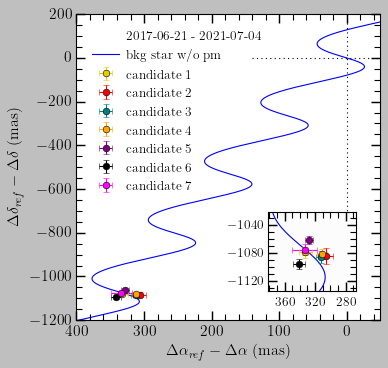

In [506]:
# Figure
fig, ax = plt.subplots(1,1,figsize=(5,4.5))
fig.subplots_adjust(left=0.18,bottom=0.12,top=0.97,right=0.94)

ax.plot([500,500],[500,500],color='white',marker=None,label='{} - {}'.format(dates[0],dates[1]))

## Add background track and detections for each epoch ##
xlim, ylim, dum, dum = fig_PMD_add_track_and_candidates(ax, RA_track,DEC_track, XRA,YDEC,YDEC_ERR,XRA_ERR,marker,
                color_detection, n_candidates=n_candidates, color_bkg=color_background, return_lim=1)


## Load specifications (target dependent) ##
params = custom_sev_epochs_sev_candidates(target,ax) 
xlim, ylim = params['xlim'], params['ylim']
x_step, y_step = params['x_step'], params['y_step']
x_maj_step, y_maj_step = params['x_maj_step'], params['y_maj_step']
x_min_step, y_min_step = params['x_min_step'], params['y_min_step']
ydeb_leg, yfin_leg = params['ydeb_leg'], params['yfin_leg']
xdeb_leg, xfin_leg = params['xdeb_leg'], params['xfin_leg']

xlim_zoom, ylim_zoom = params['xlim_zoom'], params['ylim_zoom']
add_zoom, x_step_zoom, y_step_zoom = params['add_zoom'], params['x_step_zoom'], params['y_step_zoom']
x_maj_step_zoom, y_maj_step_zoom = params['x_maj_step_zoom'], params['y_maj_step_zoom']
x_min_step_zoom, y_min_step_zoom = params['x_min_step_zoom'], params['y_min_step_zoom']
axes2_xdeb,   axes2_ydeb = params['axes2_xdeb'], params['axes2_ydeb']
axes2_xlong, axes2_ylong = params['axes2_xlong'], params['axes2_ylong']
loc = params['loc']
     
## Set limits, equal, legend, reference vertical and horizontal lines ##
fig_PMD_set_diag(ax, xlab=xlab, ylab=ylab, xlim=xlim,ylim=ylim, loc=loc, ncol=ncol,
                 xdeb_leg=xdeb_leg,xfin_leg=xfin_leg, ydeb_leg=ydeb_leg,yfin_leg=yfin_leg)

mise_en_page(ax,x_step=0,y_step=0)


# add second small plot
if add_zoom :
    add_zoom_text = '_zoom'
    axes2 = fig.add_axes([axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong]) # renvoie un objet Axes       
   
    ## Add detections and tracks for each epoch ##
    dum, dum, xlim_zoom, ylim_zoom=fig_PMD_add_track_and_candidates(axes2, RA_track,DEC_track, XRA,YDEC,YDEC_ERR,XRA_ERR,marker,color_detection,
                                     n_candidates=n_candidates, color_bkg= color_background, return_lim=1,dlim=dlim)
   
    ## Set limits, equal, legend, reference vertical and horizontal lines ##
    fig_PMD_set_zoom(axes2,  xlim=xlim_zoom,ylim=ylim_zoom)
    
    mise_en_page(axes2,x_step=x_step_zoom,y_step=y_step_zoom,x_maj_step=x_maj_step_zoom, x_min_step=x_min_step_zoom, y_maj_step=y_maj_step_zoom, y_min_step=y_min_step_zoom)
    
    # update ticks
    custom_sev_epochs_sev_candidates_ticks(target, axes2, n_epochs=2)

mise_en_page(ax,x_step=x_step,y_step=y_step, 
             x_maj_step=x_maj_step, x_min_step=x_min_step, y_maj_step=y_maj_step, y_min_step=y_min_step)
      
plt.savefig('{}PMD_{}_2epochs{}.pdf'.format(saving_dir,target,add_zoom_text))
#plt.savefig('{}PMD_{}_2epochs{}.png'.format(saving_dir,target,add_zoom_text))

In [505]:

def custom_sev_epochs_sev_candidates(target, ax, loc='upper left', n_epochs=2):
    # special cases : refined images providing the system
    x_step, y_step, x_maj_step, y_maj_step, x_min_step, y_min_step = 0, 0, 500, 500, 100, 100
    ydeb_leg, yfin_leg = None, None
    xdeb_leg, xfin_leg = None, None
        
    if target == 'GJ422' and n_epochs==3:
        xlim, ylim =  [600,-5700], [-600,3000] ; yfin_leg = 1800 #; loc = 'lower left'
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=1000, x_min_step=200, y_maj_step=1000, y_min_step=200)
        marker_epoch = ['o','d']
        add_candidate = 1
        add_zoom = 1
        xlim_zoom, ylim_zoom =  [-4400,-4500], [2150,2300] ;
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=50; x_min_step_zoom=10; y_maj_step_zoom=50; y_min_step_zoom=10
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.67, 0.45, 0.22, 0.22
        add_zoom_2 = 1
        axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2 = 0.67, 0.18, 0.22, 0.22
        xlim_zoom2, ylim_zoom2 =  [-4800,-4900], [2300,2400]


    elif target == 'GJ682' and n_epochs==3:
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=500, x_min_step=100, y_maj_step=500, y_min_step=100)
        marker_epoch = ['o','d']
        xlim, ylim =  [200, -2200], [-2200,200] ; ydeb_leg = -1600 ; loc = 'lower left'
        x_step, y_step, x_maj_step, y_maj_step, x_min_step, y_min_step = 1, 1, 500, 500, 100, 100
        add_zoom = 1
        xlim_zoom, ylim_zoom =  [-120,-160], [-70,-35] ;
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=40; x_min_step_zoom=10; y_maj_step_zoom=40; y_min_step_zoom=10
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.68, 0.69, 0.22, 0.22
        add_zoom_2 = 1
        axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2 = 0.68, 0.38, 0.22, 0.22
        xlim_zoom2, ylim_zoom2 =  [-1440,-1490], [-1920,-1860] ;


    elif target == 'HD85512' and n_epochs == 3:
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=500, x_min_step=100, y_maj_step=500, y_min_step=100)
        marker_epoch = ['o','o','o','o']
        xlim, ylim =  [1500,-500], [-1500,200] ; xdeb_leg = 550#; ydeb_leg = -1500 ; loc = 'lower left'
        add_zoom = 0
        xlim_zoom, ylim_zoom =  [1395,1370], [-1370,-1250] ;
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=20; x_min_step_zoom=10; y_maj_step_zoom=50; y_min_step_zoom=10
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.68, 0.46, 0.22, 0.22
        add_zoom_2 = 0
        axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2 = 0.68, 0.18, 0.22, 0.22
        xlim_zoom2, ylim_zoom2 =  [475,460], [-400,-350] ;

    elif target == 'HD154088' and n_epochs == 3:
        xlim, ylim =  [400,-100], [-1200,200] ; xdeb_leg = 70
        marker_epoch = ['o','d']
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=100, x_min_step=20, y_maj_step=200, y_min_step=50)
        add_zoom = 1
        xlim_zoom, ylim_zoom =  [170,110], [-590,-530] ;
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=40; x_min_step_zoom=10; y_maj_step_zoom=40; y_min_step_zoom=10
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.68, 0.48, 0.22, 0.22
        add_zoom_2 = 1
        axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2 = 0.68, 0.2, 0.22, 0.22
        xlim_zoom2, ylim_zoom2 =  [380,280], [-1120,-1040] ;


    elif target == 'HD85512'  and n_epochs == 2:
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=500, x_min_step=100, y_maj_step=500, y_min_step=100)
        xlim, ylim =  [600,-100], [-600,100] ; xdeb_leg = 550; loc ='upper left'#; ydeb_leg = -1500 ; loc = 'lower left'
        add_zoom = 0
        xlim_zoom, ylim_zoom =  [1410,1360], [-1370,-1250] ;
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=50; x_min_step_zoom=10; y_maj_step_zoom=50; y_min_step_zoom=10
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.68, 0.46, 0.22, 0.22

    elif target == 'GJ674'  and n_epochs == 2:
        xlim, ylim =  [2600,-100], [-3700,100] ; xdeb_leg = 1000
        x_step, y_step, x_maj_step, y_maj_step, x_min_step, y_min_step = 1, 1, 500, 500, 100, 100
        #mise_en_page(ax,x_step=0,y_step=0,x_maj_step=50, x_min_step=10, y_maj_step=100, y_min_step=20)
        add_zoom = 1
        xlim_zoom, ylim_zoom =  [2500,2100], [-3500,-3430] ;
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=50; x_min_step_zoom=10; y_maj_step_zoom=50; y_min_step_zoom=10
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.64, 0.2, 0.22, 0.22

    elif target == 'HD154088'  and n_epochs == 2:
        xlim, ylim =  [400,-50], [-1200,200] ; ydeb_leg = -800 ; xdeb_leg = 140
        x_step, y_step, x_maj_step, y_maj_step, x_min_step, y_min_step = 1, 1, 100, 200, 20, 50
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=100, x_min_step=20, y_maj_step=200, y_min_step=50)
        add_zoom = 1
        xlim_zoom, ylim_zoom =  [380,280], [-1120,-1040] ;
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=40; x_min_step_zoom=10; y_maj_step_zoom=40; y_min_step_zoom=10
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.66, 0.2, 0.22, 0.22

    elif target == 'HD136352'  and n_epochs == 2:
        xlim, ylim =  [600,-4600], [-1000,100] ; ydeb_leg = -450 ; xdeb_leg = 5000 ; loc = 'lower left'
        x_step, y_step, x_maj_step, y_maj_step, x_min_step, y_min_step = 1, 1, 1000, 200, 200, 50
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=1000, x_min_step=200, y_maj_step=200, y_min_step=50)
        add_zoom = 1 ; x_step_zoom=1; y_step_zoom=1
        xlim_zoom, ylim_zoom =  [-4195,-4240], [-760,-740] ;
        x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=40; y_min_step_zoom=10
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.69, 0.7, 0.22, 0.22

    elif target == 'GJ433'  and n_epochs == 2:
        xlim, ylim =  [200,-300], [-2000,200] ;loc = 'lower left' ; ydeb_leg = -1500
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=100, x_min_step=20, y_maj_step=500, y_min_step=100)
        add_zoom = 1
        xlim_zoom, ylim_zoom =  [-100,-135], [-1680,-1640] ;
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=10; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.29, 0.6, 0.22, 0.22


    elif target == 'GJ422' and n_epochs==2:
        xlim, ylim =  [100,-1000], [-50,400] ; xdeb_leg = 1000 ; yfin_leg =220#; loc = 'lower left'
        x_step, y_step, x_maj_step, y_maj_step, x_min_step, y_min_step = 1, 1, 200, 100, 50, 20
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=200, x_min_step=100, y_maj_step=100, y_min_step=20)
        add_zoom = 1
        xlim_zoom, ylim_zoom =  [-350,-440], [50,180] ;
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=40; x_min_step_zoom=10; y_maj_step_zoom=40; y_min_step_zoom=10
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.67, 0.25, 0.22, 0.22

    elif target == 'GJ682' and n_epochs==2:
        xlim, ylim =  [20,-190], [-110,20] ; ydeb_leg = -65 ; loc = 'lower right' ; ncol= 2
        x_step, y_step, x_maj_step, y_maj_step, x_min_step, y_min_step = 1, 1, 50, 50, 10, 10
        xlim_zoom, ylim_zoom =  [-120,-160], [-70,-35] ;
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=100, x_min_step=20, y_maj_step=20, y_min_step=5)
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.65, 0.7, 0.22, 0.22
        add_zoom = 0

    elif target == 'GJ832'  and n_epochs == 2:
        xlim, ylim =  [50,-200], [-200,50]  ; ydeb_leg = -200 ; loc = 'upper right' ; ncol= 1
        xlim_zoom, ylim_zoom =  [-120,-160], [-70,-35] ;
        mise_en_page(ax,x_step=1,y_step=1,x_maj_step=50, x_min_step=10, y_maj_step=50, y_min_step=10)
        x_step_zoom=1; y_step_zoom=1
        #x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.65, 0.7, 0.22, 0.22
        add_zoom = 0


    elif target == 'HD85512'  and n_epochs == 4:
        #mise_en_page(ax,x_step=1,y_step=1,x_maj_step=500, x_min_step=100, y_maj_step=500, y_min_step=100)
        xlim, ylim =  [1500,-700], [-1500,600] ; xdeb_leg = 550; loc ='upper left'#; ydeb_leg = -1500 ; loc = 'lower left'
        x_step, y_step, x_maj_step, y_maj_step, x_min_step, y_min_step = 1, 1, 500, 500, 100, 100
        add_zoom = 1
        xlim_zoom, ylim_zoom = [500,450], [-400,-350]
        x_step_zoom=1; y_step_zoom=1
        x_maj_step_zoom=50; x_min_step_zoom=10; y_maj_step_zoom=50; y_min_step_zoom=10
        axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.69, 0.48, 0.22, 0.22
        add_zoom_2 = 1
        axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2 = 0.69, 0.2, 0.22, 0.22
        xlim_zoom2, ylim_zoom2 =   [1420,1340], [-1390,-1240]


    try :
        if n_epochs == 2:
            params = {'xlim':xlim,'ylim':ylim, 'loc':loc,
              'x_step':x_step, 'y_step':y_step,
              'x_maj_step':x_maj_step, 'x_min_step':x_min_step,
              'y_maj_step':y_maj_step, 'y_min_step':y_min_step,
              'add_zoom':add_zoom, 'xlim_zoom':xlim_zoom, 'ylim_zoom':ylim_zoom,
              'x_step_zoom':x_step_zoom, 'y_step_zoom':y_step_zoom,
              'x_maj_step_zoom':x_maj_step_zoom, 'x_min_step_zoom':x_min_step_zoom,
              'y_maj_step_zoom':y_maj_step_zoom, 'y_min_step_zoom':y_min_step_zoom,
              'axes2_xdeb':axes2_xdeb, 'axes2_ydeb':axes2_ydeb,
              'axes2_xlong':axes2_xlong,'axes2_ylong':axes2_ylong,
              'ydeb_leg':ydeb_leg, 'yfin_leg':yfin_leg,
              'xdeb_leg':xdeb_leg, 'xfin_leg':xfin_leg}
            return params

        elif n_epochs >= 3:
            params = {'xlim':xlim,'ylim':ylim, 'loc':loc,
              'x_step':x_step, 'y_step':y_step,
              'x_maj_step':x_maj_step, 'x_min_step':x_min_step,
              'y_maj_step':y_maj_step, 'y_min_step':y_min_step,
              'add_zoom':add_zoom, 'xlim_zoom':xlim_zoom, 'ylim_zoom':ylim_zoom,
              'x_step_zoom':x_step_zoom, 'y_step_zoom':y_step_zoom,
              'x_maj_step_zoom':x_maj_step_zoom, 'x_min_step_zoom':x_min_step_zoom,
              'y_maj_step_zoom':y_maj_step_zoom, 'y_min_step_zoom':y_min_step_zoom,
              'axes2_xdeb':axes2_xdeb, 'axes2_ydeb':axes2_ydeb,
              'axes2_xlong':axes2_xlong,'axes2_ylong':axes2_ylong,
              'add_zoom_2':add_zoom_2,
              'axes2_xdeb2':axes2_xdeb2, 'axes2_ydeb2':axes2_ydeb2,
              'axes2_xlong2':axes2_xlong2,'axes2_ylong2':axes2_ylong2,
              'xlim_zoom2':xlim_zoom2,'ylim_zoom2':ylim_zoom2,
              'ydeb_leg':ydeb_leg, 'yfin_leg':yfin_leg,
              'xdeb_leg':xdeb_leg, 'xfin_leg':xfin_leg}
            return params
    except :
        print('No custom parameters was set.')


In [492]:

def fig_PMD_set_diag(ax, xlab,ylab, xlim,ylim, xdeb_leg,xfin_leg, ydeb_leg,yfin_leg, loc, ncol):
    '''
    Set stuff on the diagramm. Vertical and horizontal dotted lines, legend, labels, limits..
    '''
    #ax.axis('equal')
    ax.axis([xlim[0], xlim[1], ylim[0], ylim[1]])
    if yfin_leg == None: yfin_leg = ylim[1]
    if ydeb_leg == None: ydeb_leg = ylim[0]
    if xfin_leg == None: xfin_leg = xlim[1]
    if xdeb_leg == None: xdeb_leg = xlim[0]
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.legend(loc=loc,frameon=False,numpoints=1,ncol=ncol)
    plt.draw()
    mise_en_page(ax,x_step=0,y_step=0)

    #xdeb_leg = np.array(leg.get_window_extent())[0][0] # get position of the legend x1 y1 x2 y2
    ax.plot([0,0],[ydeb_leg,yfin_leg],ls=':',color='black')
    ax.plot([xdeb_leg,xfin_leg],[0,0],ls=':',c='black')
    return


In [85]:
YDEC

array([2220.3, 2220.3])

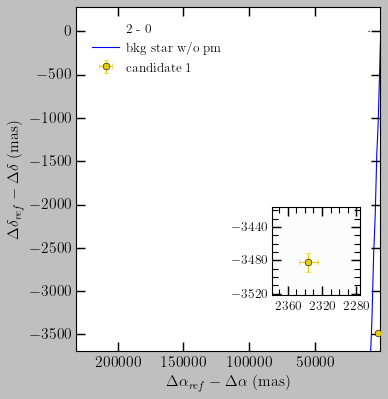

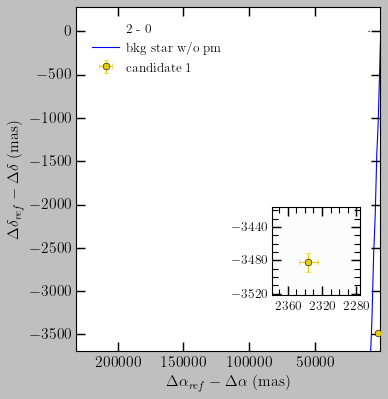

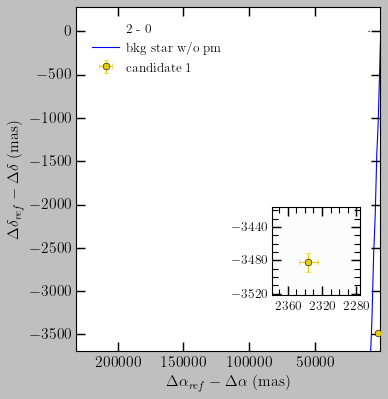

In [279]:
# Several figures in a row
n_combi_ep = len(DATES); n_epochs = 2

for k in range(n_combi_ep):
    dates = DATES[k]
    n_candidates = len(RA_BKG[k][0])
    if n_candidates > 1 : 
        RA, DEC, RA_ERR, DEC_ERR = RA_BKG[k], DEC_BKG[k], RA_ERR_BKG[k], DEC_ERR_BKG[k]    
        XRA, YDEC = RA[0]-RA[1], DEC[0]-DEC[1]
        XRA_ERR, YDEC_ERR = np.sqrt(RA_ERR[0]**2+RA_ERR[1]**2), np.sqrt(DEC_ERR[0]**2+DEC_ERR[1]**2)
        
        # Default:
        xlim, ylim = [np.nanmax(XRA), np.nanmin(XRA)], [np.nanmin(YDEC), np.nanmax(YDEC)]
        print("- {} -\nXRA: \n{}\nYDEC: \n{}\n".format(dates,XRA,YDEC))
        
    # Figure
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    fig.subplots_adjust(left=0.18,bottom=0.11,top=0.97,right=0.94)

    ax.plot([500,500],[500,500],color='white',marker=None,label='{} - {}'.format(dates[0],dates[1]))

    
    ## Add background tracks and detections for each epoch ##
    xlim, ylim, dum, dum = fig_PMD_add_track_and_candidates(ax, RA_track,DEC_track, XRA,YDEC,YDEC_ERR,XRA_ERR,marker,
                    color_detection,color_bkg=color_background,  n_candidates=n_candidates, return_lim=1)



    ## Load specifications (target dependent) ##
    params = custom_sev_epochs_sev_candidates(target,ax) 
    #xlim, ylim = params['xlim'], params['ylim']
    xlim_zoom, ylim_zoom = params['xlim_zoom'], params['ylim_zoom']
    add_zoom, x_step_zoom, y_step_zoom = params['add_zoom'], params['x_step_zoom'], params['y_step_zoom']
    x_maj_step_zoom, y_maj_step_zoom = params['x_maj_step_zoom'], params['y_maj_step_zoom']
    x_min_step_zoom, y_min_step_zoom = params['x_min_step_zoom'], params['y_min_step_zoom']
    axes2_xdeb,   axes2_ydeb = params['axes2_xdeb'], params['axes2_ydeb']
    axes2_xlong, axes2_ylong = params['axes2_xlong'], params['axes2_ylong']
    loc = params['loc']


    mise_en_page(ax,x_step=0,y_step=0)
    ## Set limits, equal, legend, reference vertical and horizontal lines ##
    fig_PMD_set_diag(ax, xlab=xlab, ylab=ylab, xlim=xlim,ylim=ylim, loc=loc, ncol=ncol,
                     xdeb_leg=xdeb_leg,xfin_leg=xfin_leg, ydeb_leg=ydeb_leg,yfin_leg=yfin_leg)


    # add second small plot
    if add_zoom  :
        add_zoom_text = '_zoom'
        axes2 = fig.add_axes([axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong]) # renvoie un objet Axes       

        ## Add detections and tracks for each epoch ##
        dum,dum,xlim_zoom, ylim_zoom=fig_PMD_add_track_and_candidates(axes2, RA_track,DEC_track, XRA,YDEC,
                YDEC_ERR,XRA_ERR,marker,color_detection,color_bkg= color_background,  n_candidates=n_candidates, return_lim=1,dlim=dlim)
        
        ## Set limits, equal, legend, reference vertical and horizontal lines ##
        fig_PMD_set_zoom(axes2,  xlim=xlim_zoom,ylim=ylim_zoom)
        if k == 0:
            x_maj_step_zoom, x_min_step_zoom, y_maj_step_zoom, y_min_step_zoom = x_maj_step_zoom_ref, x_min_step_zoom_ref, y_maj_step_zoom_ref, y_min_step_zoom_ref
        mise_en_page(axes2,x_step=x_step_zoom,y_step=y_step_zoom,x_maj_step=x_maj_step_zoom, x_min_step=x_min_step_zoom, y_maj_step=y_maj_step_zoom, y_min_step=y_min_step_zoom)

        # update ticks
        #custom_2epochs_sev_candidates_ticks(target, axes2, n_epochs=2)

    plt.savefig('{}PMD_{}_2epochs{}_{}.pdf'.format(saving_dir,target,add_zoom_text,k))
    #plt.savefig('{}PMD_{}_2epochs{}_{}.png'.format(saving_dir,target,add_zoom_text,k))
        

In [274]:
RA_BKG[k]

array([1842.6])

- More than 2 epochs but only 1 candidate

In [113]:
RA_ERR_BKG_DIFF

[[0.5, 0.5]]

In [114]:
RA_BKG, DEC_BKG, RA_ERR_BKG, DEC_ERR_BKG = np.array(RA_BKG), np.array(DEC_BKG), 5*np.array(RA_ERR_BKG), 5*np.array(DEC_ERR_BKG)

# Epochs considered
n_epochs,n_candidates = len(dates), 1

RA, DEC, RA_ERR, DEC_ERR = RA_BKG, DEC_BKG, RA_ERR_BKG, DEC_ERR_BKG
XRA, YDEC = RA[0]-RA[:], DEC[0]-DEC[:]
XRA_ERR, YDEC_ERR = np.sqrt(RA_ERR[0]**2+RA_ERR[:]**2), np.sqrt(DEC_ERR[0]**2+DEC_ERR[:]**2)

In [115]:
XRA

array([   0.   ,  -21.437, -103.809])

In [116]:
# General parameters 
# Mise en page
add_zoom, add_zoom_2 = 0,0
x_step, y_step = 1, 1
x_maj_step, y_maj_step = 20,20
x_min_step, y_min_step = 5,5

axes2_xdeb_ref,axes2_ydeb_ref, axes2_xlong_ref,axes2_ylong_ref = 0.57, 0.45, 0.22, 0.22
#x_step_zoom=0; y_step_zoom=0 
x_maj_step_zoom_ref, x_min_step_zoom_ref, y_maj_step_zoom_ref, y_min_step_zoom_ref = 40,10,40,10
#marker = 'o'


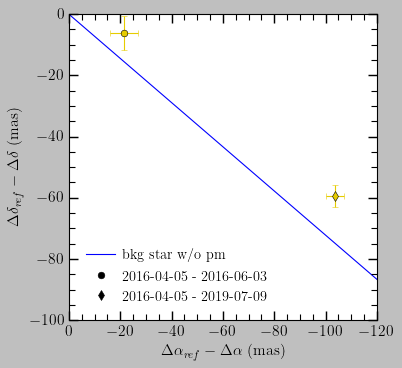

In [118]:
fig, ax = plt.subplots(1,1,figsize=(5,4.5))
fig.subplots_adjust(left=0.18,bottom=0.12,top=0.97,right=0.95)

## Add detections for each epoch ##
fig_PMD_add_track_and_candidates(ax, RA_track, DEC_track, XRA,YDEC,YDEC_ERR,XRA_ERR, marker_epoch,
                color_detection, color_bkg= color_background, n_candidates=n_candidates, 
                    n_epochs=n_epochs, dates=dates)

## Load specifications (target dependent) ##
xlim, ylim, loc, ncol, xdeb_leg, xfin_leg, ydeb_leg, yfin_leg = [0,-120], [-100,0], 'lower left', 1, None, None, None, None

## Set limits, equal, legend, reference vertical and horizontal lines ##
fig_PMD_set_diag(ax, xlab=xlab, ylab=ylab, xlim=xlim,ylim=ylim, loc=loc, ncol=ncol,
                 xdeb_leg=xdeb_leg,xfin_leg=xfin_leg, ydeb_leg=ydeb_leg,yfin_leg=yfin_leg)
    
mise_en_page(ax,x_step=x_step,y_step=y_step, 
             x_maj_step=x_maj_step, x_min_step=x_min_step, y_maj_step=y_maj_step, y_min_step=y_min_step)

plt.savefig('{}PMD_{}_3epochs{}.pdf'.format(saving_dir,target,add_zoom_text))
plt.savefig('{}PMD_{}_3epochs{}.png'.format(saving_dir,target,add_zoom_text))

In [99]:


def fig_PMD_add_track_and_candidates(ax, RA_track, DEC_track, XRA,YDEC,YDEC_ERR,XRA_ERR,marker,color_detection,color_bkg='blue',
        n_epochs=2, dates=None, n_candidates=1, add_candidate=1, return_lim=0, dlim=30):
    '''
    marker (type=list):  Otherwise, list of size the number of dates minus 1.
        i.e. list of 1 element if 'n_epochs' set to 2.
    '''
    ax.plot(RA_track,DEC_track,c=color_bkg,ls='-', label='bkg star w/o pm') #labx=xlab,laby=ylab

    color = color_detection

    if n_epochs == 2 :
        for i in range(n_candidates):
            if n_candidates < 10 :
                label = 'candidate {}'.format(i+1)
            else :
                if color_detection[i] == 'black' : label = '{} candidates'.format(n_candidates)
                else : label =''
            ax.errorbar(XRA[i],YDEC[i],YDEC_ERR[i],XRA_ERR[i],label=label,
                marker=marker[0],color=color[i],lw=0, elinewidth=1, zorder=10)

    elif n_epochs > 2 and n_candidates > 1:
        for t in range(1,n_epochs):
            for i in range(n_candidates):
                label = ''
                #if t == 1 and add_candidate : label = 'candidate {}'.format(i+1)

                ax.errorbar(XRA[t,i],YDEC[t,i],YDEC_ERR[t,i],XRA_ERR[t,i],label=label,
                        marker=marker[t-1],color=color[i],lw=0, elinewidth=1, zorder=10)

            # add epochs in leg
            ax.plot([5e5,5e5],[5e5,5e5],color='black',marker=marker[t-1],lw=0,label='{} - {}'.format(dates[0],dates[t]))

    elif n_epochs > 2 and n_candidates == 1:  # HD85512
        for t in range(1,n_epochs):
            label = ''
            ax.errorbar(XRA[t],YDEC[t],YDEC_ERR[t],XRA_ERR[t],label=label,
                    marker=marker[t-1],color=color[0],lw=0, elinewidth=1, zorder=10)

            # add epochs in leg
            ax.plot([5e5,5e5],[5e5,5e5],color='black',marker=marker[t-1],lw=0,label='{} - {}'.format(dates[0],dates[t]))


    if return_lim:
        xlim_zoom = [int(np.nanmax(XRA))+dlim,int(np.nanmin(XRA))-dlim]
        ylim_zoom = [int(np.nanmin(YDEC))-dlim,int(np.nanmax(YDEC))+dlim]

        ch = str(int(np.nanmax(abs(XRA)))) ; power = len(ch)-2 ; fact = 10**power
        xlim_fin = np.where(np.all(XRA <=0), (int((np.nanmin(XRA)-np.nanmax(abs(XRA_ERR)))/fact)-2)*fact,int(np.nanmax(abs(YDEC))/100)*10+50)
        xlim_deb = np.where(np.all(XRA <=0), int(np.nanmax(abs(YDEC))/100)*10+50,(int(np.nanmin(XRA)-np.nanmax(abs(XRA_ERR))/fact)-2)*fact)

        ch = str(int(np.nanmax(abs(YDEC)))) ; power = len(ch)-2 ; fact = 10**power
        ylim_deb = np.where(np.all(YDEC <=0), ((int(np.nanmin(YDEC)-np.nanmax(abs(YDEC_ERR)))/fact)-2)*fact,-int(np.nanmax(abs(XRA))/100)*10+50)
        ylim_fin = np.where(np.all(YDEC <=0), int(np.nanmax(abs(XRA))/100)*10+50,((int(np.nanmax(YDEC)+np.nanmax(abs(YDEC_ERR)))/fact)+2)*fact)

        xlim = [xlim_deb,xlim_fin]
        ylim = [ylim_deb,ylim_fin]

        return xlim, ylim, xlim_zoom, ylim_zoom
    return


In [81]:
help(fig_PMD_add_track_and_candidates)

Help on function fig_PMD_add_track_and_candidates in module import_functions_PMD_fig:

fig_PMD_add_track_and_candidates(ax, RA_track, DEC_track, XRA, YDEC, YDEC_ERR, XRA_ERR, marker, color_detection, color_bkg='blue', n_epochs=2, dates=None, n_candidates=1, add_candidate=1, return_lim=0, dlim=30)
    marker (type=list):  Otherwise, list of size the number of dates minus 1.
        i.e. list of 1 element if 'n_epochs' set to 2.



In [82]:
n_epochs

1

In [76]:
XRA

array([   0.   ,  -21.437, -103.809])

In [77]:
YDEC

array([  0.   ,  -6.125, -59.355])

In [501]:


def custom_sev_epochs_sev_candidates_ticks(target, axes2, n_epochs=2):
    if target == 'HD136352' and n_epochs == 2 :
        xti_old = [-4190,-4230]
        xti_new = ['$-4190$','$-4230$']
        plt.setp(axes2, xticks=xti_old, xticklabels=xti_new)

    elif target == 'GJ422' and n_epochs == 3 :
        yti_old = [2150,2200,2250,2300]
        yti_new = ['$2150$','$2200$','$2250$','$2300$']
        plt.setp(axes2, yticks=yti_old, yticklabels=yti_new)

    elif target == 'GJ433':
        yti_old = [-1680,-1660,-1640]
        yti_new = ['$-1680$','$-1660$','$-1640$']
        plt.setp(axes2, yticks=yti_old, yticklabels=yti_new)

    elif target == 'HD154088' and n_epochs == 2  :
        yti_old = [-1040,-1080,-1120]
        yti_new = ['$-1040$','$-1080$','$-1120$']
        plt.setp(axes2, yticks=yti_old, yticklabels=yti_new)

    elif target == 'GJ682' and n_epochs == 3  :
        xti_old = [-1440,-1480]
        xti_new = ['$-1440$','$-1480$']
        plt.setp(axes2, xticks=xti_old, xticklabels=xti_new)
    
    elif target == 'GJ674' and n_epochs == 2  :
        xti_old = [2350,2300]
        xti_new = ['$2350$','$2300$']
        plt.setp(axes2, xticks=xti_old, xticklabels=xti_new)

    return



In [31]:
def fig_PMD_set_zoom(axes2, xlim=None,ylim=None, fs=12 ):
    axes2.patch.set_color([0.99,0.99,0.99])
    axes2.axis([xlim[0], xlim[1], ylim[0], ylim[1]])

    for item in axes2.get_xticklabels()+axes2.get_yticklabels(): item.set_fontsize(fs)
    return

# Extra

## A la mano (IFS...)

In [ ]:
# A la mano GJ 832

target_DC = target_DC_all.iloc[0]

# initialize lists
##EPOCH_all, RA_all, DEC_all =[ '2017-05-27','2017-06-21','2017-06-27','2017-07-03'], [481.2,429,429,429], [197.7,291,291,291]
RA_ERR_all, DEC_ERR_all, X_all, Y_all = [10,10,10,10], [10,10,10,10], [30, 37,37,37], [121, 133.5,133.5]
EPOCH_all =  ['2021-06-21', '2021-06-27', '2021-07-03']
RA_all, DEC_all = [183.75,  104.125,  79.625], [  0.,     79.625, 104.125]
X_all, Y_all = [496.5, 503.,  505. ], [511.5, 518.,  520. ]

SEP_all, SEP_ERR_all, PA_all, PA_ERR_all = [distance(RA_all[0],DEC_all[0],0,0,1),distance(RA_all[1],DEC_all[1],0,0,1),distance(RA_all[1],DEC_all[1],0,0,1),distance(RA_all[1],DEC_all[1],0,0,1)], [15,15,15,15], [68,68,68,68], [30,30,30,30],

print('Target: {} (DC name: {}) \nNumber detections: {}'.format(target,target_DC, len(EPOCH_all)))
print('Epochs:', EPOCH_all[0])

print('RA:', RA_all , '\nDEC:', DEC_all) 
print('SEP:', SEP_all , '\nPA:', PA_all) 
#print('X', X_all , '\nY', Y_all)

if target == 'GJ832' :
    pixarc = pixarc_ifs
    EPOCH_all = np.array(['2017-06-21','2017-07-03'])
    X_all, Y_all = np.array([27,80.5]), np.array([110,101.5])
    RA_all, DEC_all = -(X_all - 94.5)*pixarc, (Y_all - 94.5)*pixarc
    RA_ERR_all, DEC_ERR_all = np.array([7,7]), np.array([7,7])
    SEP_all = np.sqrt(RA_all**2 + DEC_all**2)
    SEP_ERR_all = np.sqrt(RA_ERR_all**2 + DEC_ERR_all**2)
    print('RA:', RA_all , '\nDEC:', DEC_all) 

# Extra

### Derive proper motion

In [ ]:
# Initialize inputs
target = 'GJ682'
cond_target = dF['target']==target
EPOCH_all = np.array(dF['epoch'][cond_target])
EPOCH_UNIQUE = np.unique(EPOCH_all)
print(EPOCH_UNIQUE)
epochs = EPOCH_UNIQUE
unit = 'pixel'

# Run functions
pm_ra_yr, pm_dec_yr = find_proper_motion_per_year(target,unit=unit)
pm_ra, pm_dec = find_proper_motion_between_2epochs(target,list(epochs),unit=unit)
print("Proper motion per year: {:.1f} {} {:.1f} {}".format(pm_ra_yr, unit, pm_dec_yr, unit))
print("Proper motion between the two epochs: {:.1f} {} {:.1f} {}".format(pm_ra, unit, pm_dec, unit))

=====================================================================================================================

## Extra: Prepare tables

#### Print list of the targets

In [ ]:
for i in range(len(dF_prop)):
    parallax_star = PARALLAX[i]*1e-3 ; parallax_err_star = PARALLAX_ERR[i]*1e-3
    mag_H, mag_K =MAG_STAR_H[i], MAG_STAR_K[i]
    target = NAME_OBJ[i]
    d_star = 1/parallax_star
    d_err_star = parallax_err_star/parallax_star**2
    print(target, '&' #'& %.2f'% (parallax_star*1e3), '\pm %.2f'% (parallax_err_star*1e3),'& %.2f'% d_star,
          #'& %.2f'% mag_H, '& %.2f'% mag_K
         )
          #, '& %.2f'% d_err_star)

#### Print list of the detections

In [ ]:
NIGHT_OBS = np.array(dF_obs['night_obs'])
NAME_OBJ_obs  = np.array(dF_obs['target name'])
FILTER_IRDIS_OBS = np.array(dF_obs['IRDIS filter'])
FILTER_IFS_OBS = np.array(dF_obs['IFS disperser'])
for i in range(len(dF_prop)):
    target = NAME_OBJ[i]
    i_selected = (NAME_OBJ_obs == target)
    dF_obs_1target = dF_obs[i_selected]
    for k in range(len(NIGHT_OBS[i_selected])):
        night_obs = NIGHT_OBS[i_selected][k]
        filt_ird = FILTER_IRDIS_OBS[i_selected][k][2:]
        filt_ifs = FILTER_IFS_OBS[i_selected][k][4:]
        if k % 2 == 0 : # IRDIS
            print(target,'&',night_obs,'&',filt_ird,'&')
        else : # IFS
            print(target,'&',night_obs,'&',filt_ifs,'&')
    #print(target, '&' #'& %.2f'% (parallax_star*1e3), '\pm %.2f'% (parallax_err_star*1e3),'& %.2f'% d_star,
          #'& %.2f'% mag_H, '& %.2f'% mag_K
    #     )
          #, '& %.2f'% d_err_star)

## Extra: tests

In [89]:
# # TEST CONVENTION ANDROMEDA CHARAC ON HD85512 # #
# compare with SpeCal charac results
# print('RA:\n', RA_all[0][0] , '\n', RA_all[1][-1], '\nDEC:\n', DEC_all[0][0],'\n', DEC_all[1][-1])
"""
pixarc = pixarc_ird
EPOCH_all = np.array(['2017-12-30','2019-11-25'])
X_all, Y_all = np.array([837,911]), np.array([332,409])
RA_all, DEC_all = -(X_all - 511.5)*pixarc, (Y_all - 511.5)*pixarc # add minus before RA_all
RA_ERR_all, DEC_ERR_all = np.array([7,7]), np.array([7,7])
SEP_all = np.sqrt(RA_all**2 + DEC_all**2)
SEP_ERR_all = np.sqrt(RA_ERR_all**2 + DEC_ERR_all**2)
print('RA:', RA_all , '\nDEC:', DEC_all) 
"""

"\npixarc = pixarc_ird\nEPOCH_all = np.array(['2017-12-30','2019-11-25'])\nX_all, Y_all = np.array([837,911]), np.array([332,409])\nRA_all, DEC_all = -(X_all - 511.5)*pixarc, (Y_all - 511.5)*pixarc # add minus before RA_all\nRA_ERR_all, DEC_ERR_all = np.array([7,7]), np.array([7,7])\nSEP_all = np.sqrt(RA_all**2 + DEC_all**2)\nSEP_ERR_all = np.sqrt(RA_ERR_all**2 + DEC_ERR_all**2)\nprint('RA:', RA_all , '\nDEC:', DEC_all) \n"

In [ ]:
# find dra/ddec 
## ex: H23 1st epoch K12 2nd epoch
k = 1
diffX = X_all[1][0]-X_all[0][0]
print('diffX',diffX,X_all[1][k] - diffX)
diffY = Y_all[1][0]-Y_all[0][0]
print('diffY',diffY,Y_all[1][k]- diffY)
#